# **Configurations**

In [ ]:
!pip install ultralytics
!pip install ttach
!git clone https://github.com/rigvedrs/YOLO-V8-CAM.git

fatal: destination path 'YOLO-V8-CAM' already exists and is not an empty directory.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import io
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
from PIL import Image

from ultralytics import YOLO
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Définir la fonction pour appliquer EigenCAM
def apply_eigencam(image_path, model):
    plt.rcParams["figure.figsize"] = [3.0, 3.0]

    # Lecture et prétraitement de l'image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (640, 640))
    rgb_img = img.copy()
    img = np.float32(img) / 255

    target_layers = [model.model.model[-2], model.model.model[-3], model.model.model[-4]]

    # Application de EigenCAM
    cam = EigenCAM(model, target_layers, task='cls')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

    # Affichage du résultat
    im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
    combined_image = Image.fromarray(np.hstack((im, cam_image)))
    return combined_image

# **Récupération des images**

In [ ]:
dictionnaire_images = {"akiec": "", "bcc": "", "bkl": "", "df": "", "mel": "", "nv": "", "vasc": ""}
input_folder = "/content/drive/MyDrive/Cpred/Cpred/BDD/Démo"

classes = os.listdir(input_folder)
for classe in classes:
    classe_path = os.path.join(input_folder, classe)
    images = os.listdir(classe_path)
    if classe in dictionnaire_images:
        image_path = os.path.join(classe_path, images[0])
        dictionnaire_images[classe] = image_path
print("Une image de chaque classe a été importée. Elles sont prêtes pour la prédiction")

Une image de chaque classe a été importée. Elles sont prêtes pour la prédiction


# **Prediction**




image 1/1 /content/drive/MyDrive/Cpred/Cpred/BDD/Démo/akiec/ISIC_0024329.jpg: 480x480 akiec 1.00, bcc 0.00, nv 0.00, bkl 0.00, mel 0.00, 8.3ms
Speed: 9.7ms preprocess, 8.3ms inference, 0.1ms postprocess per image at shape (1, 3, 480, 480)

0: 480x480 akiec 1.00, bkl 0.00, nv 0.00, bcc 0.00, mel 0.00, 10.6ms
Speed: 9.7ms preprocess, 10.6ms inference, 0.1ms postprocess per image at shape (1, 3, 480, 480)


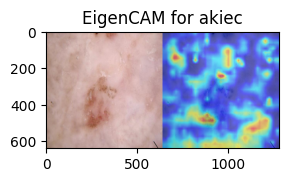


image 1/1 /content/drive/MyDrive/Cpred/Cpred/BDD/Démo/bcc/ISIC_0024448.jpg: 480x480 bcc 1.00, akiec 0.00, mel 0.00, bkl 0.00, nv 0.00, 8.3ms
Speed: 9.7ms preprocess, 8.3ms inference, 0.1ms postprocess per image at shape (1, 3, 480, 480)

0: 480x480 bcc 1.00, akiec 0.00, mel 0.00, bkl 0.00, nv 0.00, 10.6ms
Speed: 9.8ms preprocess, 10.6ms inference, 0.1ms postprocess per image at shape (1, 3, 480, 480)


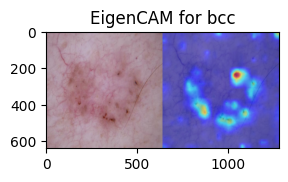


image 1/1 /content/drive/MyDrive/Cpred/Cpred/BDD/Démo/bkl/ISIC_0024382.jpg: 480x480 bkl 1.00, mel 0.00, akiec 0.00, bcc 0.00, nv 0.00, 8.3ms
Speed: 9.2ms preprocess, 8.3ms inference, 0.1ms postprocess per image at shape (1, 3, 480, 480)

0: 480x480 bkl 1.00, mel 0.00, akiec 0.00, nv 0.00, bcc 0.00, 10.4ms
Speed: 10.2ms preprocess, 10.4ms inference, 0.1ms postprocess per image at shape (1, 3, 480, 480)


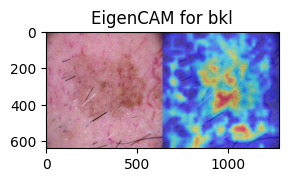


image 1/1 /content/drive/MyDrive/Cpred/Cpred/BDD/Démo/df/ISIC_0024396.jpg: 480x480 df 1.00, nv 0.00, mel 0.00, bcc 0.00, vasc 0.00, 8.3ms
Speed: 9.7ms preprocess, 8.3ms inference, 0.1ms postprocess per image at shape (1, 3, 480, 480)

0: 480x480 df 1.00, nv 0.00, mel 0.00, bcc 0.00, vasc 0.00, 10.5ms
Speed: 9.5ms preprocess, 10.5ms inference, 0.1ms postprocess per image at shape (1, 3, 480, 480)


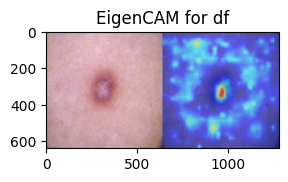


image 1/1 /content/drive/MyDrive/Cpred/Cpred/BDD/Démo/mel/ISIC_0024310.jpg: 480x480 mel 1.00, bkl 0.00, bcc 0.00, akiec 0.00, nv 0.00, 8.3ms
Speed: 9.9ms preprocess, 8.3ms inference, 0.1ms postprocess per image at shape (1, 3, 480, 480)

0: 480x480 mel 1.00, bkl 0.00, akiec 0.00, bcc 0.00, nv 0.00, 10.9ms
Speed: 14.6ms preprocess, 10.9ms inference, 0.1ms postprocess per image at shape (1, 3, 480, 480)


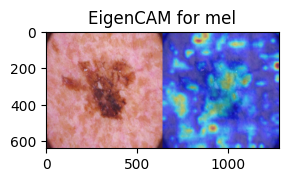


image 1/1 /content/drive/MyDrive/Cpred/Cpred/BDD/Démo/nv/ISIC_0034319.jpg: 480x480 nv 0.99, mel 0.01, bkl 0.00, df 0.00, vasc 0.00, 8.4ms
Speed: 12.6ms preprocess, 8.4ms inference, 0.1ms postprocess per image at shape (1, 3, 480, 480)

0: 480x480 nv 0.85, mel 0.15, bkl 0.00, df 0.00, vasc 0.00, 10.6ms
Speed: 10.8ms preprocess, 10.6ms inference, 0.1ms postprocess per image at shape (1, 3, 480, 480)


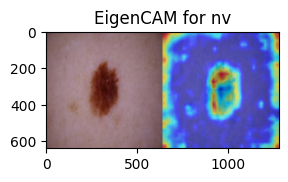


image 1/1 /content/drive/MyDrive/Cpred/Cpred/BDD/Démo/vasc/ISIC_0024706.jpg: 480x480 vasc 1.00, nv 0.00, mel 0.00, bcc 0.00, bkl 0.00, 8.3ms
Speed: 10.2ms preprocess, 8.3ms inference, 0.1ms postprocess per image at shape (1, 3, 480, 480)

0: 480x480 vasc 1.00, nv 0.00, bcc 0.00, bkl 0.00, mel 0.00, 10.6ms
Speed: 10.8ms preprocess, 10.6ms inference, 0.1ms postprocess per image at shape (1, 3, 480, 480)


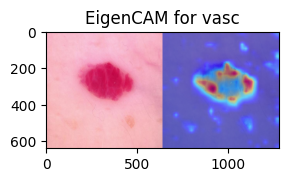

In [ ]:
model = YOLO('/content/drive/MyDrive/Cpred/Cpred/BDD/Augmented_data_split_2000/classify/train/best.pt')

predictions = {}

for key, value in dictionnaire_images.items():

    predictions[key] = model.predict(value)
    combined_image = apply_eigencam(value, model)

    plt.imshow(combined_image)
    plt.title(f"EigenCAM for {key}")
    plt.show()

In [ ]:
for index, (key, value) in enumerate(predictions.items(), start=1):
    index_classe = value[0].probs.top1
    classe_predite = value[0].names[index_classe]

    image_key = list(dictionnaire_images.keys())[index-1]
    image_value = dictionnaire_images[image_key]
    nom_fichier = image_value.split('/')[-1]

    print("Image :", nom_fichier)
    print("Vérité terrain :\x1b[34m", key, "\x1b[0m")
    print("Type prédit :\x1b[32m", classe_predite, "\x1b[0mavec une confiance de \x1b[32m", round(value[0].probs.top1conf.item(), 3), "\x1b[0m \n")


Image : ISIC_0024329.jpg
Vérité terrain : akiec 
Type prédit : akiec avec une confiance de  1.0  

Image : ISIC_0024448.jpg
Vérité terrain : bcc 
Type prédit : bcc avec une confiance de  1.0  

Image : ISIC_0024382.jpg
Vérité terrain : bkl 
Type prédit : bkl avec une confiance de  1.0  

Image : ISIC_0024396.jpg
Vérité terrain : df 
Type prédit : df avec une confiance de  1.0  

Image : ISIC_0024310.jpg
Vérité terrain : mel 
Type prédit : mel avec une confiance de  1.0  

Image : ISIC_0034319.jpg
Vérité terrain : nv 
Type prédit : nv avec une confiance de  0.993  

Image : ISIC_0024706.jpg
Vérité terrain : vasc 
Type prédit : vasc avec une confiance de  0.999  

